In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [194]:
df = pd.read_csv('/content/Corona_NLP_test.csv')

In [195]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [197]:
df.isnull().sum()

,0
UserName,0
ScreenName,0
Location,834
TweetAt,0
OriginalTweet,0
Sentiment,0


In [198]:
round((df.isnull().sum() / df.shape[0])*100,3)

,0
UserName,0.000
ScreenName,0.000
Location,21.959
TweetAt,0.000
OriginalTweet,0.000
Sentiment,0.000


In [199]:
most_used_location = df['Location'].mode()[0]
df['Location'] = df['Location'].fillna(most_used_location)

In [200]:
round((df.isnull().sum() / df.shape[0])*100,3)

,0
UserName,0.0
ScreenName,0.0
Location,0.0
TweetAt,0.0
OriginalTweet,0.0
Sentiment,0.0


In [201]:
df.nunique()

,0
UserName,3798
ScreenName,3798
Location,1717
TweetAt,15
OriginalTweet,3798
Sentiment,5


In [202]:
df = df.drop(columns = ['UserName','ScreenName'])
df.head()

,Location,TweetAt,OriginalTweet,Sentiment
0,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,United States,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


<BarContainer object of 3798 artists>

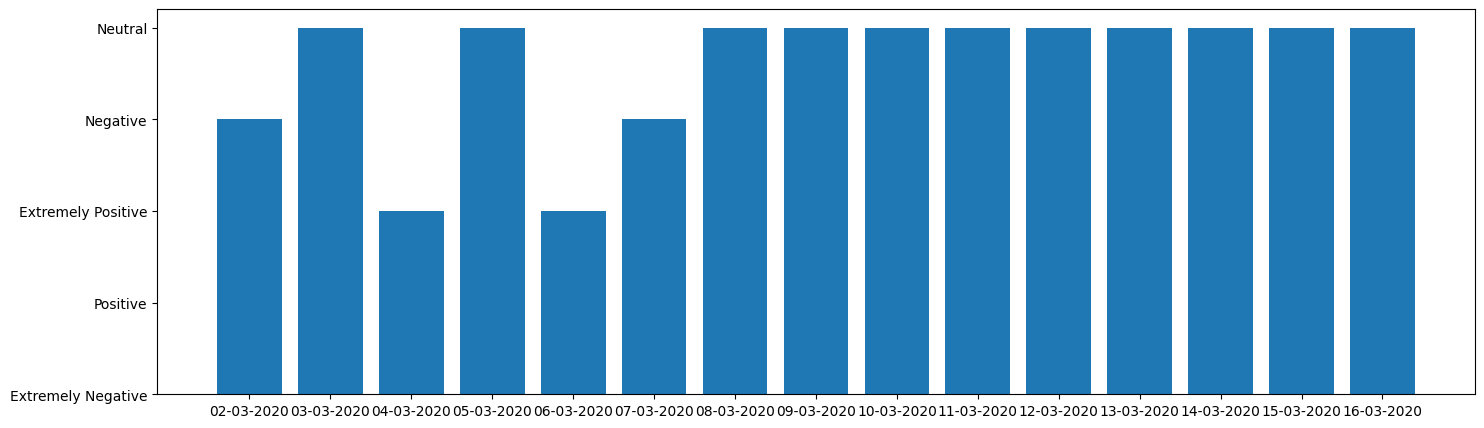

In [203]:
fig,axs = plt.subplots(figsize = (17,5))
plt.bar(df.TweetAt,df.Sentiment)

In [204]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['Location'] = encoder.fit_transform(df['Location'])

df['TweetAt'] = encoder.fit_transform(df['TweetAt'])

df['Sentiment'] = encoder.fit_transform(df['Sentiment'])

df.head()

,Location,TweetAt,OriginalTweet,Sentiment
0,967,0,TRENDING: New Yorkers encounter empty supermar...,0
1,1290,0,When I couldn't find hand sanitizer at Fred Me...,4
2,1491,0,Find out how you can protect yourself and love...,1
3,336,0,#Panic buying hits #NewYork City as anxious sh...,2
4,893,1,#toiletpaper #dunnypaper #coronavirus #coronav...,3


In [205]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['Location','TweetAt']] = scaler.fit_transform(df[['Location','TweetAt']])

df.head()

,Location,TweetAt,OriginalTweet,Sentiment
0,0.563520,0.000000,TRENDING: New Yorkers encounter empty supermar...,0
1,0.751748,0.000000,When I couldn't find hand sanitizer at Fred Me...,4
2,0.868881,0.000000,Find out how you can protect yourself and love...,1
3,0.195804,0.000000,#Panic buying hits #NewYork City as anxious sh...,2
4,0.520396,0.071429,#toiletpaper #dunnypaper #coronavirus #coronav...,3


In [206]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()

df['OriginalTweet'] = df['OriginalTweet'].apply(lambda sentence : " ".join([lemmatizer.lemmatize(word) for word in sentence.split()]))

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Location,TweetAt,OriginalTweet,Sentiment
0,0.563520,0.000000,TRENDING: New Yorkers encounter empty supermar...,0
1,0.751748,0.000000,When I couldn't find hand sanitizer at Fred Me...,4
2,0.868881,0.000000,Find out how you can protect yourself and love...,1
3,0.195804,0.000000,#Panic buying hit #NewYork City a anxious shop...,2
4,0.520396,0.071429,#toiletpaper #dunnypaper #coronavirus #coronav...,3


In [207]:
X = df.drop(columns = 'Sentiment')
y = df.Sentiment

In [208]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [209]:
from tensorflow.keras.layers import TextVectorization

vectorizer = TextVectorization(max_tokens = 100,output_sequence_length = 10000)
vectorizer.adapt(X_train['OriginalTweet'])

In [210]:
from tensorflow.keras.layers import Embedding

embedding = Embedding(input_dim = 10000,output_dim = 128)

In [211]:
import tensorflow as tf
from tensorflow.keras import Sequential,layers

model = Sequential([
    vectorizer,
    embedding,
    layers.LSTM(250),
    layers.Dense(1,activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

model.fit(X_train['OriginalTweet'],y_train,epochs = 3,validation_data = (X_test['OriginalTweet'],y_test))

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


95/95 ━━━━━━━━━━━━━━━━━━━━ 53s 534ms/step - accuracy: 0.1542 - loss: nan - val_accuracy: 0.1513 - val_loss: nan
Epoch 2/3
95/95 ━━━━━━━━━━━━━━━━━━━━ 81s 521ms/step - accuracy: 0.1596 - loss: nan - val_accuracy: 0.1513 - val_loss: nan
Epoch 3/3
95/95 ━━━━━━━━━━━━━━━━━━━━ 82s 525ms/step - accuracy: 0.1493 - loss: nan - val_accuracy: 0.1513 - val_loss: nan
